# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('data/loan_small.csv')
dataset.head()

,Loan_ID,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Area,Loan_Status
0,LP001002,NaN,5849.0,0.0,NaN,urban,Y
1,LP001003,Male,4583.0,NaN,128.0,semi,N
2,LP001005,Male,3000.0,0.0,66.0,NaN,Y
3,LP001006,Female,2583.0,2358.0,120.0,semi,NaN
4,LP001008,Male,NaN,0.0,141.0,urban,Y


In [6]:
#Acess the dataframe data using oñpc
subset = dataset.iloc[0:3,1:3]
subset

,Gender,ApplicantIncome
0,NaN,5849.0
1,Male,4583.0
2,Male,3000.0


In [11]:
#Access the data using column names
subsetN = dataset[['Gender','ApplicantIncome']] [0:3]
subsetN

,Gender,ApplicantIncome
0,NaN,5849.0
1,Male,4583.0
2,Male,3000.0


In [12]:
#read the TSV file using pandas
datasetT = pd.read_csv('data/loan_small_tsv.txt',sep='\t')
datasetT

,Loan_ID,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Area,Loan_Status
0,LP001002,NaN,5849.0,0.0,NaN,urban,Y
1,LP001003,Male,4583.0,NaN,128.0,semi,N
2,LP001005,Male,3000.0,0.0,66.0,NaN,Y
3,LP001006,Female,2583.0,2358.0,120.0,semi,Y
4,LP001008,Male,NaN,0.0,141.0,urban,Y
5,LP001011,Male,5417.0,4196.0,267.0,semi,Y
6,LP001013,Male,2333.0,1516.0,NaN,semi,Y
7,LP001014,Female,3036.0,2504.0,158.0,semi,N
8,LP001018,Male,4006.0,1526.0,168.0,rural,Y
9,LP001020,Male,12841.0,10968.0,349.0,semi,N


In [13]:
dataset.columns

Index(['Loan_ID', 'Gender', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Area', 'Loan_Status'],
      dtype='object')

In [16]:
dataset.shape

(16, 7)

In [17]:
dataset.isnull().sum(axis=0)

Loan_ID              0
Gender               1
ApplicantIncome      2
CoapplicantIncome    1
LoanAmount           3
Area                 1
Loan_Status          1
dtype: int64

In [18]:
#Drop the rows with missing values
cleandata = dataset.dropna()
cleandata = dataset.dropna(subset=['Loan_Status'])

In [26]:
#Replace with mode for categorical
dt = dataset.copy()
cols = ['Gender', 'Area', 'Loan_Status']
dt[cols] = dt[cols].fillna(dt.mode().iloc[0])
dt.isnull().sum()

Loan_ID              0
Gender               0
ApplicantIncome      2
CoapplicantIncome    1
LoanAmount           3
Area                 0
Loan_Status          0
dtype: int64

In [44]:
# Replace missing numerical values using column names
cols2 = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
# fillna for filling NaN values
dt[cols2] = dt[cols2].fillna(dt[cols2].mean())
dt.isnull().sum(axis=0)

Loan_ID              0
Gender               0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Area                 0
Loan_Status          0
dtype: int64

In [45]:
dt.dtypes

Loan_ID               object
Gender                object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Area                  object
Loan_Status           object
dtype: object

In [46]:
#label encoding using pandas
dt[cols] = dt[cols].astype('category')
for columns in cols:
    dt[columns] = dt[columns].cat.codes

In [47]:
dt

,Loan_ID,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Area,Loan_Status
0,LP001002,1,5849.000000,0.000000,140.923077,2,1
1,LP001003,1,4583.000000,2509.333333,128.000000,1,0
2,LP001005,1,3000.000000,0.000000,66.000000,1,1
3,LP001006,0,2583.000000,2358.000000,120.000000,1,1
4,LP001008,1,4103.571429,0.000000,141.000000,2,1
5,LP001011,1,5417.000000,4196.000000,267.000000,1,1
6,LP001013,1,2333.000000,1516.000000,140.923077,0,1
7,LP001014,0,3036.000000,2504.000000,158.000000,1,0
8,LP001018,1,4006.000000,1526.000000,168.000000,0,1
9,LP001020,1,12841.000000,10968.000000,349.000000,1,0


In [50]:
# ---------------------------------------------------------
# Hot encoding or Dummy Variable Creation
# ---------------------------------------------------------

# Drop a column using column name
df2 = dataset.drop(['Loan_ID'], axis=1)

In [51]:
# using get_dummies function of Pandas
df2 = pd.get_dummies(df2)

In [52]:
df2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Area_rural,Area_semi,Area_urban,Loan_Status_N,Loan_Status_Y
0,5849.0,0.0,NaN,False,False,False,False,True,False,True
1,4583.0,NaN,128.0,False,True,False,True,False,True,False
2,3000.0,0.0,66.0,False,True,False,False,False,False,True
3,2583.0,2358.0,120.0,True,False,False,True,False,False,False
4,NaN,0.0,141.0,False,True,False,False,True,False,True
5,5417.0,4196.0,267.0,False,True,False,True,False,False,True
6,2333.0,1516.0,NaN,False,True,True,False,False,False,True
7,3036.0,2504.0,158.0,True,False,False,True,False,True,False
8,4006.0,1526.0,168.0,False,True,True,False,False,False,True
9,12841.0,10968.0,349.0,False,True,False,True,False,True,False


In [53]:
#Z score
dataset = pd.read_csv('data/loan_small.csv')
dataset.head()

,Loan_ID,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Area,Loan_Status
0,LP001002,NaN,5849.0,0.0,NaN,urban,Y
1,LP001003,Male,4583.0,NaN,128.0,semi,N
2,LP001005,Male,3000.0,0.0,66.0,NaN,Y
3,LP001006,Female,2583.0,2358.0,120.0,semi,NaN
4,LP001008,Male,NaN,0.0,141.0,urban,Y


In [58]:
cleandata = dataset.dropna()
cleandata

,Loan_ID,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Area,Loan_Status
5,LP001011,Male,5417.0,4196.0,267.0,semi,Y
7,LP001014,Female,3036.0,2504.0,158.0,semi,N
8,LP001018,Male,4006.0,1526.0,168.0,rural,Y
9,LP001020,Male,12841.0,10968.0,349.0,semi,N
10,LP001024,Female,3200.0,700.0,70.0,urban,Y
11,LP001027,Male,2500.0,1840.0,109.0,urban,Y
13,LP001029,Male,1853.0,2840.0,114.0,urban,N
14,LP001030,Male,1299.0,1086.0,17.0,semi,Y
15,LP001032,Male,4950.0,0.0,125.0,semi,Y


In [60]:
#Extract the thre numerical columns
data_to_scale = cleandata.iloc[:,2:5]
data_to_scale

,ApplicantIncome,CoapplicantIncome,LoanAmount
5,5417.0,4196.0,267.0
7,3036.0,2504.0,158.0
8,4006.0,1526.0,168.0
9,12841.0,10968.0,349.0
10,3200.0,700.0,70.0
11,2500.0,1840.0,109.0
13,1853.0,2840.0,114.0
14,1299.0,1086.0,17.0
15,4950.0,0.0,125.0


In [64]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler_ = StandardScaler()

In [69]:
ss_scaler = scaler_.fit_transform(data_to_scale)

In [98]:
data_to_scale['ZApplicantIncome']=ss_scaler[:,0]
data_to_scale['ZCoapplicantIncome']=ss_scaler[:,1]
data_to_scale['ZLoanAmount']=ss_scaler[:,2]
data_to_scale

,ApplicantIncome,CoapplicantIncome,LoanAmount,ZApplicantIncome,ZCoapplicantIncome,ZLoanAmount
5,5417.0,4196.0,267.0,0.328798,0.433902,1.199535
7,3036.0,2504.0,158.0,-0.401263,-0.111989,0.052611
8,4006.0,1526.0,168.0,-0.103842,-0.427521,0.157834
9,12841.0,10968.0,349.0,2.605142,2.618757,2.062358
10,3200.0,700.0,70.0,-0.350977,-0.694014,-0.873346
11,2500.0,1840.0,109.0,-0.565611,-0.326215,-0.462978
13,1853.0,2840.0,114.0,-0.763994,-0.003585,-0.410367
14,1299.0,1086.0,17.0,-0.933861,-0.569479,-1.431024
15,4950.0,0.0,125.0,0.185607,-0.919856,-0.294623


In [71]:
import matplotlib.pyplot as plt

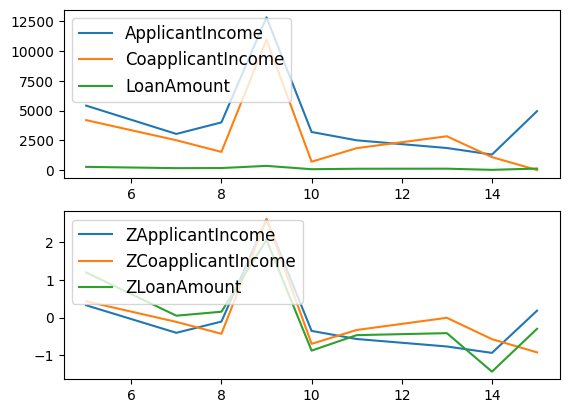

In [97]:
plt.subplot(2,1,1)
plt.plot(data_to_scale['ApplicantIncome'], label='ApplicantIncome')
plt.plot(data_to_scale['CoapplicantIncome'], label='CoapplicantIncome')
plt.plot(data_to_scale['LoanAmount'], label='LoanAmount')
plt.legend(loc=2,fontsize=12)
plt.subplot(2,1,2)
plt.plot(data_to_scale['ZApplicantIncome'], label='ZApplicantIncome')
plt.plot(data_to_scale['ZCoapplicantIncome'], label='ZCoapplicantIncome')
plt.plot(data_to_scale['ZLoanAmount'], label='ZLoanAmount')
plt.legend(loc=2,fontsize=12)
plt.show()

In [99]:
# MinMax Normalization of the data
from sklearn.preprocessing import minmax_scale

In [109]:
# Fit and Transform the data for MinMax normalization
mm_scaler = minmax_scale(data_to_scale,feature_range=(0,1))
mm_scaler[:,1]

array([0.38256747, 0.22830051, 0.13913202, 1.        , 0.06382203,
       0.16776076, 0.25893508, 0.09901532, 0.        ])

In [101]:
# ----------------------------------------------------------
# Split the Data by rows and columns
# ----------------------------------------------------------
df = dataset.copy()

In [102]:
# Split by column for X(independent) and Y(dependent) variables
X = df.iloc[:, :-1]
Y = df.iloc[:,  -1]

In [103]:
# Split by rows for training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =      \
train_test_split(X, Y, test_size=0.3, random_state=1234)

In [110]:
X_train

,Loan_ID,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Area
2,LP001005,Male,3000.0,0.0,66.0,NaN
10,LP001024,Female,3200.0,700.0,70.0,urban
7,LP001014,Female,3036.0,2504.0,158.0,semi
1,LP001003,Male,4583.0,NaN,128.0,semi
9,LP001020,Male,12841.0,10968.0,349.0,semi
8,LP001018,Male,4006.0,1526.0,168.0,rural
4,LP001008,Male,NaN,0.0,141.0,urban
5,LP001011,Male,5417.0,4196.0,267.0,semi
6,LP001013,Male,2333.0,1516.0,NaN,rural
3,LP001006,Female,2583.0,2358.0,120.0,semi


In [111]:
X_test

,Loan_ID,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Area
13,LP001029,Male,1853.0,2840.0,114.0,urban
11,LP001027,Male,2500.0,1840.0,109.0,urban
0,LP001002,NaN,5849.0,0.0,NaN,urban
12,LP001028,Female,NaN,8106.0,NaN,urban
14,LP001030,Male,1299.0,1086.0,17.0,semi


In [112]:
Y_train

2       Y
10      Y
7       N
1       N
9       N
8       Y
4       Y
5       Y
6       Y
3     NaN
15      Y
Name: Loan_Status, dtype: object

In [113]:
Y_test

13    N
11    Y
0     Y
12    Y
14    Y
Name: Loan_Status, dtype: object